In [50]:
# Dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab as pl
import statsmodels.api as sm


In [2]:
# Import csv
csvpath = os.path.join("data", "clean_data.csv")
data_df = pd.read_csv(csvpath)
data_df["id"] = data_df.index + 1
del data_df["Unnamed: 0"]
data_df.head()

,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker,id
0,4.0,2.0,2.0,4.0,2,3.0,1.0,1.0,0,0.0,0.0,1
1,4.0,3.0,2.0,2.0,4,2.0,1.0,1.0,0,0.0,0.0,2
2,4.0,2.0,1.0,5.0,1,4.0,1.0,1.0,1,1.0,1.0,3
3,2.0,1.0,2.0,5.0,1,2.0,1.0,1.0,0,0.0,0.0,4
4,3.0,1.0,2.0,4.0,1,4.0,1.0,1.0,0,1.0,1.0,5


In [81]:
# Get dummies for analysis
# Dependent Variable
gh_df = pd.get_dummies(data_df['General Health'], prefix="gh")

# Covariates
pop_df = pd.get_dummies(data_df['(%) of Population Under FPL'], prefix="pop")
fv_df = pd.get_dummies(data_df['Eaten Fruits or Veggies Yesterday'], prefix="fv")
#age_df = pd.get_dummies(data_df['Age Group'], prefix="age")
#race_df = pd.get_dummies(data_df['Race'], prefix="race")
#ed_df = pd.get_dummies(data_df['Education'], prefix="ed")
# Insured, Exercise, Sex, Drinker, Smoker already binomially coded
smoker = data_df["Smoker"]
#analysis_df = pd.concat([gh_df, pop_df, fv_df, age_df, race_df, ed_df], axis=1)

analysis_df = pd.concat([gh_df, smoker,fv_df], axis=1)
analysis_df

,gh_1.0,gh_2.0,gh_3.0,gh_4.0,gh_5.0,Smoker,fv_1.0,fv_2.0,fv_3.0
0,0,0,0,1,0,0.0,0,1,0
1,0,0,0,1,0,0.0,0,1,0
2,0,0,0,1,0,1.0,1,0,0
3,0,1,0,0,0,0.0,0,1,0
4,0,0,1,0,0,1.0,0,1,0
5,0,1,0,0,0,1.0,0,1,0
6,0,0,1,0,0,1.0,0,1,0
7,0,1,0,0,0,0.0,0,1,0
8,0,0,1,0,0,0.0,0,1,0
9,0,0,0,0,1,1.0,0,1,0


In [82]:
covariates_gh5 = analysis_df
print(type(covariates_gh5))
del covariates_gh5["gh_1.0"]
del covariates_gh5["gh_2.0"]
del covariates_gh5["gh_3.0"]
del covariates_gh5["gh_4.0"]
del covariates_gh5["fv_1.0"]



<class 'pandas.core.frame.DataFrame'>


In [83]:
analysis_df.columns.values

array(['gh_5.0', 'Smoker', 'fv_2.0', 'fv_3.0'], dtype=object)

In [84]:
covariates_gh5.head().T

,0,1,2,3,4
gh_5.0,0.0,0.0,0.0,0.0,0.0
Smoker,0.0,0.0,1.0,0.0,1.0
fv_2.0,1.0,1.0,0.0,1.0,1.0
fv_3.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X = covariates_gh5.iloc[:, 1:]
y = covariates_gh5["gh_5.0"]
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 266.682624
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 gh_5.0   No. Observations:                 7913
Model:                          Logit   Df Residuals:                     7910
Method:                           MLE   Df Model:                            2
Date:                Sat, 09 Jun 2018   Pseudo R-squ.:                     inf
Time:                        13:18:33   Log-Likelihood:            -2.1103e+06
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Smoker        -0.1052      0.052     -2.030      0.042      -0.207      -0.004
fv_2.0        -1.4636      

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [86]:
print (np.exp(result.params))

Smoker    0.900174
fv_2.0    0.231404
fv_3.0    0.386918
dtype: float64


In [87]:
proba = result.predict(X)

NameError: name 'lower' is not defined

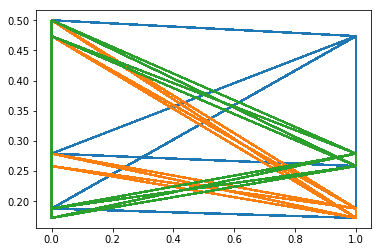

In [90]:

#cov = model.cov_params()
#gradient = (proba * (1 - proba) * X.T).T # matrix of gradients for each observation
#std_errors = np.array([np.sqrt(np.dot(np.dot(g, cov), g)) for g in gradient])
#c = 1.96 # multiplier for confidence interval
#upper = np.maximum(0, np.minimum(1, proba + std_errors * c))
#lower = np.maximum(0, np.minimum(1, proba - std_errors * c))

plt.plot(X, proba)
plt.plot(X, lower, color='g')
plt.plot(X, upper, color='g')
plt.show()

In [60]:
#var(proba) = np.dot(np.dot(gradient.T, cov), gradient)

SyntaxError: can't assign to function call (<ipython-input-60-f570721e3cf0>, line 1)

In [89]:
print(proba)

0       0.187919
1       0.187919
2       0.473733
3       0.187919
4       0.172394
5       0.172394
6       0.172394
7       0.187919
8       0.187919
9       0.172394
10      0.172394
11      0.172394
12      0.278977
13      0.172394
14      0.187919
15      0.187919
16      0.187919
17      0.187919
18      0.172394
19      0.500000
20      0.187919
21      0.172394
22      0.187919
23      0.278977
24      0.172394
25      0.500000
26      0.172394
27      0.172394
28      0.187919
29      0.172394
          ...   
7883    0.172394
7884    0.172394
7885    0.187919
7886    0.258322
7887    0.172394
7888    0.172394
7889    0.187919
7890    0.172394
7891    0.172394
7892    0.187919
7893    0.172394
7894    0.172394
7895    0.187919
7896    0.473733
7897    0.172394
7898    0.172394
7899    0.500000
7900    0.187919
7901    0.187919
7902    0.187919
7903    0.172394
7904    0.187919
7905    0.187919
7906    0.258322
7907    0.172394
7908    0.187919
7909    0.187919
7910    0.5000

In [91]:
data_df["model_Prob"] = proba

In [94]:
data_df.head()

,General Health,(%) of Population Under FPL,Eaten Fruits or Veggies Yesterday,Age Group,Race,Education,Insured,Exercise,Sex,Drinker,Smoker,id,Smoker_Prob,model_Prob
0,4.0,2.0,2.0,4.0,2,3.0,1.0,1.0,0,0.0,0.0,1,0.50000,0.187919
1,4.0,3.0,2.0,2.0,4,2.0,1.0,1.0,0,0.0,0.0,2,0.50000,0.187919
2,4.0,2.0,1.0,5.0,1,4.0,1.0,1.0,1,1.0,1.0,3,0.21402,0.473733
3,2.0,1.0,2.0,5.0,1,2.0,1.0,1.0,0,0.0,0.0,4,0.50000,0.187919
4,3.0,1.0,2.0,4.0,1,4.0,1.0,1.0,0,1.0,1.0,5,0.21402,0.172394


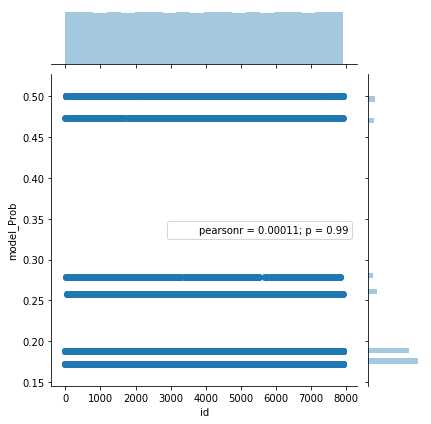

In [93]:
sns.jointplot(x="id", y="model_Prob", data=data_df)

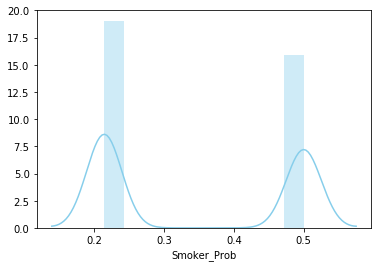

In [98]:

sns.distplot( data_df["Smoker_Prob"] , color="skyblue")
